In Shapefiles, information about the coordinate reference system is stored in the .prj -file. If this file is missing, you might be in trouble!. When reading the data into GeoDataFrame with Geopandas crs information is automatically stored into the .crs attribute of the GeoDataFrame.

In [3]:
import geopandas as gpd

#read the file
fp = r"L2_data/Europe_borders.shp"
data = gpd.read_file(fp)

In [4]:
#check the coordinate reference system
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
#verify geometry column to see if CRS of GeoDataFrame is correct
data['geometry'].head() 

#coordinate values of the Polygons indeed look like latitude and longitude values, so everything seems to be in order.

0    POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1    POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2    POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3    POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4    POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
Name: geometry, dtype: geometry

Let’s re-project our data into EPSG 3035 using epsg -parameter:

In [8]:
#lets make a backup copy of our data
data_wgs84 = data.copy()

#reproject the data ETRS-LAEA projection.
data = data.to_crs(epsg=3055)

In [10]:
#check the new geometry values
data['geometry'].head()

0    POLYGON ((2373985.490 6453772.402, 2373463.731...
1    POLYGON ((2716215.442 5726911.311, 2716349.955...
2    POLYGON ((2312680.116 6301470.367, 2312429.672...
3    POLYGON ((2319706.130 6306970.440, 2319497.026...
4    POLYGON ((2320856.962 6311425.393, 2319820.337...
Name: geometry, dtype: geometry

Plot data with EPSG4326 & EPSG3055

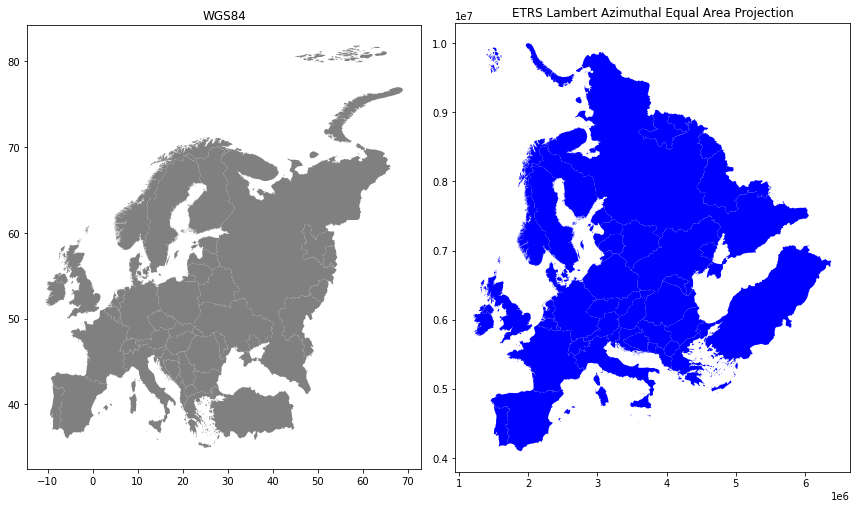

In [18]:
import matplotlib.pyplot as plt

#make subplots that are next to each other (1x2)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,12) )

#Plot the data in WGS84 CRS
data_wgs84.plot(ax=ax1, facecolor='gray')

#add title
ax1.set_title("WGS84")

#plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue')

#add title 
ax2.set_title("ETRS Lambert Azimuthal Equal Area Projection")

#set aspect ratio as 1
#ax1.set_aspect(aspect=1)
#ax2.set_aspect(aspect=1)

#remove empty white space around the plot
plt.tight_layout()


In [19]:
#output filepath of new projection
outfp = "L2_data/Europe_borders_epsg3055.shp"

#save shapefile
data.to_file(outfp)

C:\Users\aly\AppData\Local\Continuum\anaconda3\envs\python-gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


 pyproj is a Python wrapper around a software called PROJ (maintained by OSGeo community), which is widely used tool for conducting coordinate transformations in various GIS softwares

In [22]:
### Import CRS class from pyproj
from pyproj import CRS

#proj dictionary
crs_dict = data_wgs84.crs

#pyproj CRS object:
crs_object = CRS(data_wgs84.crs)

#EPSG code (here, the input crs information is a bit vague so we need to lower the confidence threshold
crs_epsg = CRS(data_wgs84.crs).to_epsg(min_confidence=25)

#PROJ string
crs_proj4 = CRS(data_wgs84.crs).to_proj4()

#Well known text (WKT)
crs_wkt = CRS(data_wgs84.crs).to_wkt()

In [25]:
print("Proj dictionary: \n" , crs_dict)
print("\nCRS object: \n", crs_object)
print("\nEPSG code: \n", crs_epsg)
print("\nPROJ string: \n", crs_proj4)
print("\nWell-Known Text (WKT): \n", crs_wkt)

Proj dictionary: 
 epsg:4326

CRS object: 
 GEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]

EPSG code: 
 4326

PROJ string: 
 +proj=longlat +datum=WGS84 +no_defs +type=crs

Well-Known Text (WKT): 
 GEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SC

Pyproj CRS object

In [28]:
#get current CRS of data
print(data.crs)

epsg:3055


In [29]:
#initialize CRS class for epsg code 3035
crs_object = CRS.from_epsg(3035)
crs_object

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.17)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terr

parse CRS information individually as follows:

In [31]:
#get name
print("Name:" , crs_object.name)

#get coordinate system
print("Coordinate system:", crs_object.coordinate_system)

#get Boundas of the area where CRS is used
print("Bounds:", crs_object.area_of_use.bounds)

Name: ETRS89-extended / LAEA Europe
Coordinate system: cartesian
Bounds: (-35.58, 24.6, 44.83, 84.17)


convert the crs information from one format to another. Quite often it is useful to know the EPSG code of the CRS.

In [34]:
#retrive CRS information in WKT format
#.prj file of a Shapefile contains the information in this format.

crs_wkt = crs_object.to_wkt()
print(crs_wkt)

PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",DATUM["European Terrestrial Reference System 1989",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",10,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",4321000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",3210000,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["northing (Y)",north,ORDER[1],LENGTHUNIT["metre",1]],AXIS["easting (X)",east,ORDER[2],LENGTHUNIT["metre",1]],USAGE[SCOPE["Statistical analysis."],AREA["Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and H

extract EPSG code from WKT format

In [35]:
#Retrieve EPSG code from WKT text
epsg = CRS(crs_wkt).to_epsg()
print(epsg)

3035


Sometimes to_epsg() isn’t able to recognize the EPSG code from the WKT representation. This can happen if the WKT information is missing some details. Luckily, we can easily adjust the minimum level of confidence for matching the CRS info and the EPSG code. We can do this by adjusting a parameter min_confidence when calling the function. By default, the confidence level is 70 %, but it is also possible to set a lower confidence threshold.

Save data in WKT format as the CRS of GEODATAFRAME. WKT is preferred output format when storing CRS info as text

In [37]:
#re-define the CRS of the input GeoDataFrame -> convert to WKT
data.crs = CRS.from_epsg(3035).to_wkt()
print(data.crs)

PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",DATUM["European Terrestrial Reference System 1989",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",10,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",4321000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",3210000,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["northing (Y)",north,ORDER[1],LENGTHUNIT["metre",1]],AXIS["easting (X)",east,ORDER[2],LENGTHUNIT["metre",1]],USAGE[SCOPE["Statistical analysis."],AREA["Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and H

In [38]:
#output filepath
outfp = "L2_data/Europe_borders_epsg3035.shp"

#save to disk
data.to_file(outfp)

C:\Users\aly\AppData\Local\Continuum\anaconda3\envs\python-gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Global Map Projections